# AutoEncode
---
- 표현(특징) 학습
    * 데이터에서 주요 특징을 찾아 압축 후 복원하는 학습 모델
- 구성
    * 인코더(Encoder) : 입력 데이터에서 주요 특징 추출 / 압축
    * 디코더(Decoder) : 주요 특징에서 원 데이터로 복원

In [1]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비 및 로딩

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## [2] 데이터 전처리

In [4]:
x_train=x_train.reshape(-1, 28*28)/255.0

In [5]:
x_train[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
x_test=x_test.reshape(-1, 28*28)/255.0

In [7]:
x_test[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [9]:
x_train, x_test, y_train, y_test=train_test_split(x_train, y_train,
                                                  random_state=12,
                                                  stratify=y_train)

In [10]:
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train,
                                                  random_state=12,
                                                  stratify=y_train)

In [11]:
print(x_train.shape, x_test.shape, x_val.shape)

(33750, 784) (15000, 784) (11250, 784)


## [3] 모델 구성 및 생성

퍼셉트론 개수 조절 노드수 조절할 수 있도록 모델 생성 함수 만들기 

In [12]:
# W, b 초기값 고정
set_random_seed(11)

In [13]:
def createAEModel(n_node):
    model=Sequential()
    # 입력
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    # 출력
    model.add(Dense(784, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [14]:
oneModel=createAEModel(1)
fiveModel=createAEModel(5)
tenFiveModel=createAEModel(15)

In [15]:
hundModel=createAEModel(100)

In [16]:
oneModel.summary(), fiveModel.summary(), tenFiveModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 784)               1568      
                                                                 
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 3925      
                                                                 
 dense_3 (Dense)             (None, 784)               4704      
                                                                 
Total params: 8,629
Trainable pa

(None, None, None)

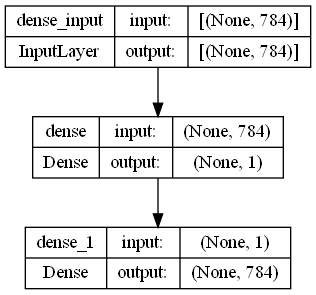

In [17]:
plot_model(oneModel, show_shapes=True)

## [4] 모델 학습

In [18]:
# x 값 모두 입력 데이터
oneModel.fit(x_train, x_train, epochs=10, verbose=0)
fiveModel.fit(x_train, x_train, epochs=10, verbose=0)
tenFiveModel.fit(x_train, x_train, epochs=10, verbose=0)

In [19]:
hundModel.fit(x_train, x_train, epochs=10, verbose=0)

In [55]:
oneModel.evaluate(x_test, x_test)

469/469 [==============================] - 1s 990us/step - loss: 0.0629


0.0628964975476265

## [5] 예측
---
- 새로운 데이터 사용

In [56]:
pre_out1=oneModel.predict(x_val[0].reshape(-1,784))
pre_out5=fiveModel.predict(x_val[0].reshape(-1,784))
pre_out15=tenFiveModel.predict(x_val[0].reshape(-1,784))

1/1 [==============================] - 0s 46ms/step


In [57]:
pre_out100=hundModel.predict(x_val[0].reshape(-1,784))

1/1 [==============================] - 0s 47ms/step


In [58]:
pre_out1.shape

(1, 784)

### 원본 이미지 - AE 진행된 이미지 비교
- auto encoder

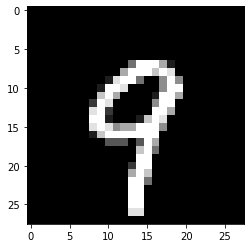

In [59]:
plt.imshow(x_val[0].reshape(28,28), cmap='gray')
plt.show()

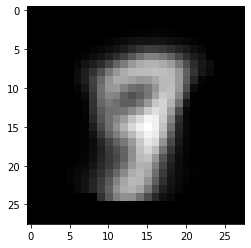

In [60]:
plt.imshow(pre_out1.reshape(28,28), cmap='gray')
plt.show()

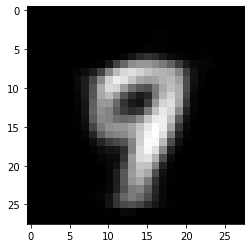

In [61]:
plt.imshow(pre_out5.reshape(28,28), cmap='gray')
plt.show()

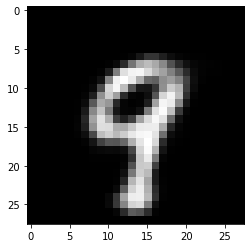

In [62]:
plt.imshow(pre_out15.reshape(28,28), cmap='gray')
plt.show()

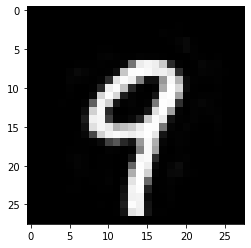

In [63]:
plt.imshow(pre_out100.reshape(28,28), cmap='gray')
plt.show()